## Class 1 - Formulating a modeling problem
In our first lecture, we discussed a few overarching points related to this course. Let's do a quick recap:
- The core of this course will be devoted to exploring ways in which we can extract knowledge from data;
- This relies on the fact that we need to be able to "ask questions" to our data;
- Most of these questions will revolve around learning a mathematical or algorithmic model of relations between some features and an outcome, or, when no outcome is available, learning "structures" within our feature space;
- We can do so for two (not mutually exclusive) reasons: to be able to infer the outcome from the features we can observe or to understand how and why inputs and outcomes are related;
- Here, we will mostly focus on developing models which are **good at inferring outcomes from features** in new data.


We emphasized that an important skill for a data scientist is that of being able to identify **questions** that can be answered with data. Let's start getting our hands dirty with this in this first class. Today, the focus will be formulating an interesting predictive questions based on a dataset of your own choice.

### Structure of today's exercise
For this class, your goal is to perform the following tasks:
1. Together with your group, choose one of these datasets (or find a new one)
    - HippoCorpus (a dataset of recalled or imagined stories, paired with a number of story- and participant-related metadata: https://www.kaggle.com/datasets/saurabhshahane/hippocorpus)
    - EEG Psychiatric Disorders Dataset: https://www.kaggle.com/datasets/shashwatwork/eeg-psychiatric-disorders-dataset?resource=download (from this paper: https://www.frontiersin.org/journals/psychiatry/articles/10.3389/fpsyt.2021.707581/full)
    - Personalities and random number choices from OpenPsychometrics: https://openpsychometrics.org/_rawdata/ (search for "random numbers")
    - A large-scale data set containing data from a bike-sharing service and weather information: https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset.



2. Load the corresponding data, which you will find under `Project Files/data` using `pandas`



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
ran_num = pd.read_csv('/work/data/class_01/randomnumber.csv')
ran_num_code = pd.read_csv('/work/data/class_01/randomnumber_codebook.csv')



3. Using `pandas` and `seaborn`, get a grasp of the overall characteristics of the dataset:
    - What is the size of your dataset, and how many features are available? 
        - Hint: Use `DataFrame.shape` from `pandas`
    - What kind of information do the columns include?
        - Hint: Read the dataset's documentation + associated papers. Methods like `.info()` or `.describe()` could also be useful.
    - What *types* of variables does each of the column contain? What kind of values do we expect to find in each column?
        - Hint: to extract this information analytically, look into `pandas` `dtype`, `unique`, and `min`/`max` functions
        - To plot this information, use `seaborn` functions (`displot`, `pointplot`, `catplot` or `boxplot` could be helpful)
    - What is the proportion of missing values for each column? Is there any column with a worryingly high proportion of missing values?
        - Hint: use the `.isnull()` method and aggregate over rows using `.sum()`
    - What is the proportion of missing values for each row? Is there any row with a worryingly high proportion of missing values?
        - Hint: very similar to what you did above
    - Is there any very apparent structure in your data, e.g., clusters of highly correlated features? 
        - Hint: use pandas `.corr()` and seaborn `clustermap` to look into that: https://seaborn.pydata.org/generated/seaborn.clustermap.html



##### The questions are group by the personality traits: 
**E q:** Extraversion <br>
**N q:** neuroticism <br>
**A q:** Agreeableness<br>
**C q:**  Consientiousness<br>
**O q:** Openess to epxerience <br>


Answering from 0-5 (0 are probably dunnos)

In [3]:
print(ran_num.shape)
ran_num.head()


(1369, 71)


,submittime,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,2015-03-29 10:29:36,56,786,48,479,23,632,31,38,61,...,4,4,2,4,5,5,5,3,5,3
1,2015-03-29 06:24:30,5,500,77,102,65,1223,50,16,14,...,5,1,3,1,4,2,5,5,5,4
2,2015-03-29 02:40:41,8,18,88,666,28,1233,99,27,2,...,4,1,5,1,4,1,4,2,5,4
3,2015-03-28 10:17:47,99,999,98,499,99,1233,99,49,99,...,4,1,5,1,5,1,5,4,5,5
4,2015-03-28 10:15:47,40,500,77,200,50,133,70,17,80,...,3,3,4,2,4,1,4,4,5,3


<Axes: >

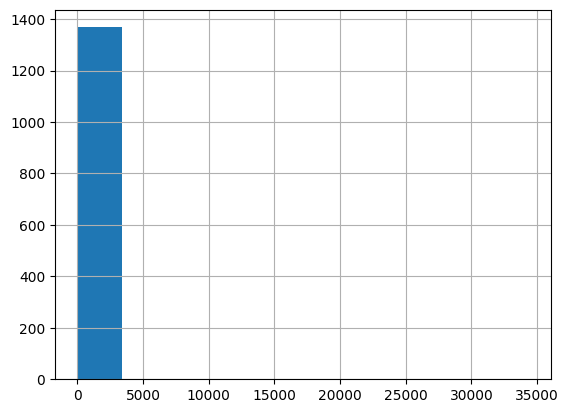

In [8]:
ran_num['R1'].hist()




4. Think about what information the dataset contains, and formulate one of the following:
    - A prediction question that can be addressed in terms of predictive performance in a regression task;
    - A prediction question that can be addressed in terms of predictive performance in a classification task



**REGRESSION**: 
- correlations between the values answered and the size of the random number 
- outcome vs. predictors 

**CLASSIFICATION**: 
- grouping quantiles of random numbers 
- classify the choice of number by the 



##### question asked:
We assume:
- personality types (given scores) can be used to predict whether or not people report extreme or middle random numbers
- We choose certain questions  

BASELINES: 
- the most simple way to compare to - often mean or median (metrics) => this may drift over time, which means it is sensitive to time although it is intially quite strong
- this is want we want to beat and compare to!! 

In [13]:
grouped_data = ran_num

##### we group and calculate a score in each of the five traits ==> this is done following the guide found online of the Five Traits 
grouped_data['N'] = 38 - ran_num['N1'] + ran_num['N2'] - ran_num['N3'] + ran_num['N4'] - ran_num['N5'] -ran_num['N6'] - ran_num['N7'] -ran_num['N8']-ran_num['N9']-ran_num['N10']    
grouped_data['E'] = 20+ran_num['E1']-ran_num['E2']+ran_num['E3']-ran_num['E4']+ran_num['E5']-ran_num['E6']+ran_num['E7']-ran_num['E8']+ran_num['E9']-ran_num['E10']
grouped_data['A'] = 14-ran_num['A1']+ran_num['A2']-ran_num['A3']+ran_num['A4']-ran_num['A5']+ran_num['A6']-ran_num['A7']+ran_num['A8']+ran_num['A9']+ran_num['A10']
grouped_data['C'] = 14+ran_num['C1']-ran_num['C2']+ran_num['C3']-ran_num['C4']+ran_num['C5']-ran_num['C6']+ran_num['C7']-ran_num['C8']+ran_num['C9']+ran_num['C10']
grouped_data['O'] = 8+ran_num['O1']-ran_num['O2']+ran_num['O3']-ran_num['O4']+ran_num['O5']-ran_num['O6']+ran_num['O7']+ran_num['O8']+ran_num['O9']+ran_num['O10'] 

grouped_data = grouped_data[['N','E','A','C','O', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8','R9','R10']]
grouped_data

,N,E,A,C,O,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10
0,21,36,39,27,22,56,786,48,479,23,632,31,38,61,128
1,17,29,38,18,35,5,500,77,102,65,1223,50,16,14,70
2,29,29,33,25,33,8,18,88,666,28,1233,99,27,2,68
3,12,13,37,13,38,99,999,98,499,99,1233,99,49,99,139
4,23,12,29,29,29,40,500,77,200,50,133,70,17,80,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364,16,10,35,29,31,60,400,65,200,34,789,57,30,34,100
1365,3,36,19,26,40,34,783,55,397,55,400,52,49,52,79
1366,15,27,19,23,34,50,50,55,454,50,130,99,34,34,77
1367,33,24,33,20,36,99,999,66,266,89,1099,77,49,88,99



5. For the regression OR classification task you have formulated, answer the following questions:
    - What kind of metric can you use to assess whether the model predicts successfully?
        - *accuracy in percentages?*
    - What is the simplest performance baseline with no predictors you can use to assess your model's accuracy?
    - What is the simplest performance baseline with predictors you can use to assess your model's accuracy?
        - *using different information criterias comparing models seeing how the simplest model performance*
    - Can you produce some visualizations to get a sense for whether any clear pattern is emerging?
        - Hint: you can use `seaborn` `displot`, `pointplot` or `boxplot` to visualize distributions and their summaries, `scatterplot` or `lmplot` to produce scatterplots 
        (e.g., visualizing relations between variables)

### Once you have done this
1. Share your answers to 4 and 5 on the Brightspace Padlet
2. Keep your notebooks, I will ask you to briefly run us through them!
3. Next week, we will select a subset of your questions, and work on them for the first few weeks